### Подключение библиотек


In [118]:
import yfinance as yf 
from datetime import datetime 
import pandas as pd 
import numpy as np 
pd.core.common.is_list_like = pd.api.types.is_list_like 
import pandas_datareader as pdr 
import statistics
from fractions import Fraction as F
from decimal import Decimal as D
import matplotlib.pyplot as plt
import seaborn as sns
import math
import networkx as nx
from networkx.algorithms import community
import itertools
from operator import itemgetter
import statistics
from time import monotonic

### Добавление тикеров для заданных рынков:
- S&P
- Germany
- NYSE
- MOEX  (Russia)
- NIKKEI  (Jpan)

In [4]:
SP_stocks = ['AMD', 'NVDA', 'IPGP', 'WDC', 'MU', 'URI', 'WYNN', 'DXC', 'MYL', 'FCX', 'MCHP', 'SWK', 'SIVB', 'CPRI', 'DVN', 'LNC', 'XEC', 'FLS', 'XLNX', 'APA', 'NTAP', 'TPR', 'SWKS', 'ALGN', 'AMAT', 'PVH', 'APTV', 'ALXN', 'KLAC', 'CDNS', 'ADI', 'EMN', 'GE', 'PH', 'MXIM', 'ALB', 'AMP', 'BWA', 'CXO', 'TXT', 'AMG', 'C', 'TWTR', 'MRO', 'AAL', 'ADSK', 'ETFC', 'HAL', 'LB', 'FDX', 'LVS', 'GPS', 'STX', 'PXD', 'AAPL', 'TRIP', 'SLB', 'UNM', 'IVZ', 'HOG', 'FTI', 'SNPS', 'MSCI', 'MOS', 'AVGO', 'NBL', 'VLO', 'FAST', 'NOV', 'FANG', 'PFG', 'PRU', 'TIF', 'CAT', 'ROK', 'ANSS', 'TROW', 'NFLX', 'HES', 'EMR', 'TXN', 'MS', 'UAA', 'PNR', 'ETN', 'ITW', 'ATVI', 'CMI', 'HFC', 'ISRG', 'MGM', 'XRX']
Germany_stocks = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE', 'BMW.DE', 'CBK.DE', 'CON.DE', 'DAI.DE', 'DB1.DE', 'DBK.DE', 'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE', 'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE', 'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'AIR.DE', 'ARL.DE', 'BOSS.DE', 'DEQ.DE', 'DUE.DE', 'EVD.DE', 'FIE.DE', 'FRA.DE', 'G1A.DE', 'GBF.DE', 'GIL.DE', 'HNR1.DE', 'JUN3.DE', 'KRN.DE', 'KU2.DE', 'LEO.DE', 'LXS.DE', 'MAN.DE', 'NDA.DE', 'RHK.DE', 'SPR.DE', 'SZG.DE', 'SZU.DE', 'TEG.DE', 'ADV.DE', 'AFX.DE', 'BC8.DE', 'COK.DE', 'DLG.DE', 'DRI.DE', 'EVT.DE', 'FNTN.DE', 'JEN.DE', 'LPK.DE', 'MOR.DE', 'NEM.DE', 'PFV.DE', 'QIA.DE', 'QSC.DE', 'SBS.DE', 'UTDI.DE', 'AAD.DE', 'BDT.DE', 'BVB.DE', 'BYW6.DE', 'COM.DE', 'DEZ.DE', 'GLJ.DE', 'GMM.DE', 'GSC1.DE', 'INH.DE', 'MLP.DE', 'PUM.DE', 'RAA.DE', 'SGL.DE', 'SIX2.DE', 'SKB.DE', 'TTK.DE']
NYSE_stocks = ['MFA','F','GE','BAC','CHK','CCL','XOM','BA','T','MRO','WFC','FCX','MGM','PFE','DAL','OXY','MS','HAL','NLY','RCL','DIS','JPM','CPE','M','C','VZ','AUY','KO','RIG','KGC','SLB','S','KEY','SWN','CVX','X','SU','CTL','APA','GM','WMB','RRC','DNR','PG','CVS','KR','V','MO','NKE','DVN','HBI','TJX','HST','RF','IBN','LYV','WMT','JNJ','TSM','MRK','LVS','USB','HPQ','CCJ','BSX','COP','GGB','MDT','CLF']
Russia_stocks=['ROSN.ME','SBERP.ME','SBER.ME','LKOH.ME','GAZP.ME','NVTK.ME','GMKN.ME','TATN.ME','TATNP.ME','SNGS.ME','SNGSP.ME','NLMK.ME','CHMF.ME','ALRS.ME','MAGN.ME','PLZL.ME','MTSS.ME','VTBR.ME','MGNT.ME','IRAO.ME','PHOR.ME','HYDR.ME','TRNFP.ME','POLY.ME','PIKK.ME','MOEX.ME','FEES.ME','RTKM.ME','RSTI.ME','NMTP.ME','AFLT.ME','AFKS.ME','MVID.ME','TRMK.ME','MTLRP.ME','MTLR.ME']
Japan_stocks = ['7203.T','9984.T','9437.T','9432.T','8306.T','9433.T','6758.T','8316.T','7267.T','9983.T','2914.T','8058.T','8411.T','9022.T','7751.T','6902.T','6954.T','3382.T','6367.T','7201.T','4452.T','4063.T','8766.T','9020.T','4519.T','4503.T','4502.T','6501.T','8001.T','8031.T','4911.T','4548.T','6301.T','6752.T']

# 1. Сбор данных с помощью yfinance

In [5]:
yf.pdr_override() 
start = datetime(2014, 1, 1) 
end = datetime(2015, 1, 31) 
data_in_SP = yf.download(SP_stocks, start=start, end=end) 
data_in_SP.to_csv('data_in.csv')
print(type(data_in_SP))

[****************      34%                       ]  31 of 92 completed

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

[*********************100%***********************]  92 of 92 completed
<class 'pandas.core.frame.DataFrame'>


In [6]:
yf.pdr_override() 
start = datetime(2014, 1, 1) 
end = datetime(2015, 1, 31) 
data_in_NYSE = yf.download(NYSE_stocks, start=start, end=end) 
data_in_NYSE.to_csv('data_in_NYSE.csv')


[*********************100%***********************]  69 of 69 completed


In [7]:
yf.pdr_override() 
start = datetime(2014, 1, 1) 
end = datetime(2015, 1, 31) 
data_in_G = yf.download(Germany_stocks, start=start, end=end) 
data_in_G.to_csv('data_in_G.csv')



[*********************100%***********************]  85 of 85 completed


In [8]:
yf.pdr_override() 
start = datetime(2014, 1, 1) 
end = datetime(2015, 1, 31) 
data_in_R = yf.download(Russia_stocks, start=start, end=end) 
data_in_R.to_csv('data_in_R.csv')





[*********************100%***********************]  36 of 36 completed


In [9]:
yf.pdr_override() 
start = datetime(2014, 1, 1) 
end = datetime(2015, 1, 31) 
data_in_J = yf.download(Japan_stocks, start=start, end=end) 
data_in_J.to_csv('data_in_J.csv')

[*********************100%***********************]  34 of 34 completed


### Пример данных NYSE

In [10]:
data_in_NYSE

Adj Close                                                     \
                  APA       AUY          BA        BAC    BSX          C   
Date                                                                       
2013-12-31  74.715439  7.970775  115.759911  14.121276  12.02  47.411667   
2014-01-02  74.315514  8.303661  115.912590  14.601966  11.91  47.557236   
2014-01-03  74.367668  8.183455  116.718285  14.883119  11.93  48.585350   
2014-01-06  75.037117  8.248179  117.388313  15.109859  12.33  48.958389   
2014-01-07  76.419418  8.349894  119.169350  14.964743  12.44  49.295036   
...               ...       ...         ...        ...    ...        ...   
2015-01-26  56.913662  3.965858  116.361824  14.479661  14.96  44.517887   
2015-01-27  57.019592  4.078898  114.981819  14.278681  14.74  43.989750   
2015-01-28  53.956299  3.890495  121.196159  13.885857  14.59  42.897068   
2015-01-29  54.053413  3.796295  128.260986  14.095973  14.85  43.370655   
2015-01-30  55.236347  3.871655  126.169312  13.840180  14.81  42.760452   

                                                          ...   Volume  \
                  CCJ        CCL          CHK        CLF  ...      TJX   
Date                                                      ...            
2013-12-31  17.956812  33.189735  5006.799316  23.546803  ...  3256200   
2014-01-02  17.576405  32.892292  4910.869141  23.205416  ...  4197000   
2014-01-03  17.386202  32.925331  4873.973633  22.504671  ...  3302600   
2014-01-06  17.178709  32.413074  4833.387695  22.145313  ...  6277000   
2014-01-07  17.403496  32.627895  4853.680176  21.965641  ...  6293800   
...               ...        ...          ...        ...  ...      ...   
2015-01-26  12.595204  39.623585  4004.258301   6.836830  ...  5423200   
2015-01-27  12.886680  39.081257  4026.128662   6.439120  ...  5990600   
2015-01-28  12.453884  38.267776  3803.448730   6.268672  ...  6187400   
2015-01-29  12.286065  38.030510  3819.354492   5.785738  ...  5677200   
2015-01-30  12.383223  37.250916  3813.389893   6.079286  ...  6132400   

                                                                        \
                 TSM       USB         V        VZ       WFC       WMB   
Date                                                                     
2013-12-31   7647200   4335400   6448400   7557100  13243500   6645100   
2014-01-02   6029100   7045800  10654000   9270200  17333100   6257600   
2014-01-03  11362700   4455000   7809600  12022200  14693800   4621500   
2014-01-06  10370200   8096000   8577600  16054800  18438900   6996100   
2014-01-07  13083100  11027800   8178000  17594600  16897000   8347700   
...              ...       ...       ...       ...       ...       ...   
2015-01-26  14091400   4607600   8552400  15064400  13429400   7027200   
2015-01-27  14735300   5395500  11027600  17008900  14351600   7887000   
2015-01-28  16762900   7580400  11430800  19575800  18775100   9390100   
2015-01-29  19411300   6882900  15668400  19161600  16700000   9570500   
2015-01-30  17590300  10416500  22151600  22768000  21754800  15053500   

                                          
                 WMT         X       XOM  
Date                                      
2013-12-31   3859100   4658600   8509600  
2014-01-02   6878000  11902400  11028100  
2014-01-03   4957400   5317100   9295600  
2014-01-06   7280200   5616000  11848500  
2014-01-07   5012300   4729100  11187000  
...              ...       ...       ...  
2015-01-26   4666700  12984000  10672500  
2015-01-27   6020500  15481700  12301500  
2015-01-28   5936800  34683400  17829700  
2015-01-29   6522800  21801100  22683000  
2015-01-30  10280200  15564200  22679900  

[273 rows x 414 columns]

# 2. Вычисление логарифмических доходностей 

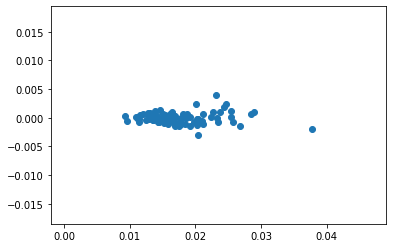

In [14]:
logR_in_SP=np.log(data_in_SP["Close"]/data_in_SP["Close"].shift(1))
logR_in_SP = logR_in_SP.drop(datetime.strptime('2013-12-31', '%Y-%m-%d'))

logR_in_G = np.log(data_in_G["Close"]/data_in_G["Close"].shift(1))
logR_in_G = logR_in_G.drop(datetime.strptime('2014-01-02', '%Y-%m-%d'))

logR_in_NYSE = np.log(data_in_NYSE["Close"]/data_in_NYSE["Close"].shift(1))
logR_in_NYSE = logR_in_NYSE.drop(datetime.strptime('2013-12-31', '%Y-%m-%d'))

logR_in_R = np.log(data_in_R["Close"]/data_in_R["Close"].shift(1))
logR_in_R = logR_in_R.drop(datetime.strptime('2014-01-06', '%Y-%m-%d'))

logR_in_J = np.log(data_in_J["Close"]/data_in_J["Close"].shift(1))
logR_in_J = logR_in_J.drop(datetime.strptime('2014-01-06', '%Y-%m-%d'))

E = logR_in_SP.mean(axis=0)
stDev = logR_in_SP.std(axis=0)
plt.scatter(stDev,E)

# 3. Вспомогательные функции

### Проверка на отсутствие данных

In [15]:
def empty_check(stocks,E):
    import math
    listOfNoData=[]
    for i in range(len(E)):
        if math.isnan(E[i]):
            listOfNoData.append(i)
        
    print("list of empty data",listOfNoData)
    for i in listOfNoData:
        print(stocks[i])
   #if listOfNoData:
       # return(stocks[listOfNoData])
   #else: 
       # return([])

### Создание графа: функция, которая по входным логарифмическим доходностям строит корреляционную матрицу и возвращает граф, построенный на этих значениях

In [79]:
def create_graph(log,stocks,T):
    dataset = []
    names = []
    e=[]
    Graph = nx.Graph()
    for i in range(0,len(stocks)):
        e.append(np.array(statistics.mean(log[stocks[i]])))
    stde=np.cov(log.values.T)
    e=np.array(e)
    dataset = np.random.multivariate_normal(e,stde,T)
    dataset=pd.DataFrame(dataset)
    corr=np.corrcoef(dataset.values.T)  
    for i in range(0,len(stocks)):
        names.append((i))
    for i in range(len(stocks)):
        for j in range(len(stocks)):
            if i!=j:
                if corr[i][j] > 0:
                    Graph.add_edge(i, j, weight=corr[i][j])
                else:
                    Graph.add_edge(i, j, weight= -corr[i][j])
                
    return  (Graph,dataset,names)

### Функция, помогающая обработать результаты nx.fiedler_vector. Создает два списка вершин, исходя из результатов и возвращает 2 подграфа, состоящих из вершин списков

In [17]:
def parse_data_from_spectral(graph,res):
    list1,list2 = [], []
    for i in range(len(res)):
        if res[i]<0:
            list1.append(list(graph.nodes)[i])
        else:
            list2.append(list(graph.nodes)[i])
    #print("lists in parse",list1,list2)
    return(graph.subgraph(list1),graph.subgraph(list2))

### Фунция реализация спектрального метода. Использует рекурсивный подход. На вход подается число кластеров и если вершин в обеих половинах достаточно, то мы половину делений делаем в первом подграфе и другую половину во втором. Достаточное количество вершин для дальнейшего деления - 6



In [141]:

def separate_graph_by_spectral(graph,k,w, res_Spectral, weight_scheme_spectral):

    if k>0:
        graph1, graph2 = parse_data_from_spectral(graph, nx.fiedler_vector(graph,weight='weight'))
        if len(list(graph1.nodes))>len(list(graph2.nodes)):
            cur = graph1
            graph1 = graph2
            graph2 = cur
        k = k-1
        w = w/2
        if k>0:
            if len(list(graph1.nodes)) < 3:
                res_Spectral.append(list(graph1.node))
                weight_scheme_spectral.append(w)
                b1, b2,unknow1, unknow2 = separate_graph_by_spectral(graph2,k,w, res_Spectral, weight_scheme_spectral)
                
                return(graph1, graph2, res_Spectral, weight_scheme_spectral)   
            else:
                a1, a2,unknow1, unknow2 = separate_graph_by_spectral(graph1,math.ceil(k/2),w, res_Spectral, weight_scheme_spectral)
        else:
            weight_scheme_spectral.append(w)
            res_Spectral.append(list(graph1.node))
        if k>1:
            b1, b2,unknow1, unknow2 = separate_graph_by_spectral(graph2,k - math.ceil(k/2),w, res_Spectral, weight_scheme_spectral)
        else:
            weight_scheme_spectral.append(w)
            res_Spectral.append(list(graph2.node))
        return(graph1, graph2,res_Spectral, weight_scheme_spectral)            

### Фунция, помогающая обработать результат Stoer-Wagner. Исходя из результатов- 2 списков вершин , возвращает 2 подграфа

In [19]:
def parse_data_from_mincut(graph,res):
    list1 = res[0]
    list2 = res[1]
    return(graph.subgraph(list1),graph.subgraph(list2))

### Реализация алгоритма Стоера-Вагнера

In [124]:
def separate_by_Stoer_Wagner(graph,k,w,res_StW ,weight_scheme_StW):
   
    if k>0:
        a = list(graph.nodes)[0]
        b = list(graph.nodes)[len(list(graph.nodes))-1]
        cut_val, part = nx.stoer_wagner(graph, weight='weight')
       # print(cut_val,part)
        graph1, graph2 = parse_data_from_mincut(graph, part)
        if len(list(graph1.nodes))>len(list(graph2.nodes)):
            cur = graph1
            graph1 = graph2
            graph2 = cur
        k = k-1
        w = w/2
        if k>0:
            if len(list(graph1.nodes)) < 5:
                res_StW.append(list(graph1.node))
                weight_scheme_StW.append(w)
                b1, b2, unknow1, unknow2 = separate_by_Stoer_Wagner(graph2,k,w,res_StW ,weight_scheme_StW)
                
                return(graph1, graph2, res_StW, weight_scheme_StW)   
            else:
                a1, a2,unknow1, unknow2 = separate_by_Stoer_Wagner(graph1,math.ceil(k/2),w,res_StW ,weight_scheme_StW)
        else:
            weight_scheme_StW.append(w)
            res_StW.append(list(graph1.node))
        if k>1:
            b1, b2,unknow1, unknow2 = separate_by_Stoer_Wagner(graph2,k - math.ceil(k/2),w,res_StW ,weight_scheme_StW)
        else:
            weight_scheme_StW.append(w)
            res_StW.append(list(graph2.node))
            
            
        return(graph1, graph2, res_StW, weight_scheme_StW)     
    

### Реализация алгоритма Жирвана-Ньюмена

In [21]:
def heaviest(G):
    u, v, w = max(G.edges(data='weight'), key=itemgetter(2))
    return (u, v)

In [22]:
def separate_by_Girvan_Newman(graph,k):


    com = community.girvan_newman(graph, most_valuable_edge=heaviest)
    limited = itertools.takewhile(lambda c: len(c) <= k, com)
    dic = {}
    for communities in limited:
        #each separation
        old_key = -1
        for c in communities:
            
            #if (dic.get(str(c))) == None:
            if (tuple(c) in dic) == False:
                for i in dic.keys():
                    
                    if tuple(c)[0] in i:
                        old_v = dic.get(i)
                        old_key = i
                        
                if old_key != -1:
                    other = {tuple(c): old_v/2 }
                    dic.update(other)
                else: 
                    other = {tuple(c): 0.5 }
                    dic.update(other)
        if old_key != -1:
            dic.pop(old_key)
            
        res = (communities)
    weight=[]
    total = []
    for i in res:
        weight.append(dic.get(tuple(i)))
        total.append(list(i)) 
    return(total,weight)


### EW  порфель считается, как добавление всех компаний с равным весом. 

### MV  порфель считается, как портфель с минимальным риском


In [104]:
def create_portfolio_EW(logR,stocks):
   
    weight = 1/(len(stocks))
    cur_log_r = 0
    nstock= []
    for i in range(0,len(stocks)):
        cur_log_r += weight * logR[stocks[i]]
        nstock.append(i)

    #return (cur_log_r,[weight]*len(stocks))
    return (nstock,[weight]*len(stocks))

def create_portfolio_MV(stocks,logR,n):
    #testLogR = logR[stocks]
    V = np.cov(logR.values.T)
    w=0
    if np.linalg.det(V) == 0:
        return ("error","error")
    vec1 = [1]*len(stocks)
    vec1=np.array(vec1)
    vec1T = vec1.T
    vec1T=np.array(vec1T)
    V_inv = np.linalg.inv(V)
    w = np.dot(V_inv,vec1)/np.dot(np.dot(vec1T,V_inv),vec1)
    res = logR[stocks[0]]*w[0]
    nstock= []
    for i in range(0,len(stocks)):
        #res += logR[stocks[i]]*w[i]
        nstock.append(i)
    return (nstock,w)
    

### Подсчет весов для схемы 1: подграфы имеют половины веса исходного графа считаются во время работы алгаритма кластеризации
### Схема 2: каждый итоговый кластер имеет одинаковый вес считается тут


In [24]:
def scheme_2(res):
    scheme = [] 
    for i in range(len(res)):
        scheme.append(1/len(res))
        
    return scheme

### Создание данных для "истинного" портфеля . Для нормального распределения

In [48]:
def create_data_normal(logR_in,stocks,T):
    E=[]
    StDev=[]
    for i in (stocks):
        E.append(statistics.mean(logR_in[i]))
        StDev.append(statistics.stdev(logR_in[i])) 
    dataset = []
    names = []
    Graph = nx.Graph()
    for i in range(0,len(stocks)):
        dataset.append(np.random.normal(E[i],StDev[i],T))
    dataset=pd.DataFrame(dataset).T
    for i in range(0,len(stocks)):
        names.append((i))            
    sigma = np.cov(logR_in.values.T)
    mer=np.corrcoef(logR_in.values.T)
    for i in range(len(stocks)):
        for j in range(len(stocks)):
            mer[i][j]=sigma[i][j]/(np.sqrt(sigma[i][i]*sigma[j][j]))
            if i!=j  and ((i<=35 and j<=35) or (i>=35 and j>=35)):
                if mer[i][j] > 0:
                    Graph.add_edge(i, j, weight=mer[i][j])
                else:
                    Graph.add_edge(i, j, weight= -mer[i][j])
                
    return (Graph,dataset,names)

### Для распределения Стьюдента

In [47]:

def create_data_Student(logR_in,stocks,T):
    E=[]
    StDev=[]
    for i in (stocks):
        E.append(statistics.mean(logR_in[i]))
        StDev.append(statistics.stdev(logR_in[i])) 
    dataset = []
    names = []
    Graph = nx.Graph()
    for i in range(0,len(stocks)):
        dataset.append(np.random.standard_t(len(logR_in[stocks[0]]), size=T))
    dataset=pd.DataFrame(dataset).T
    for i in range(0,len(stocks)):
        names.append((i))            
    sigma = np.cov(logR_in.values.T)
    mer=np.corrcoef(logR_in.values.T)
    for i in range(len(stocks)):
        for j in range(len(stocks)):
            mer[i][j]=sigma[i][j]/(np.sqrt(sigma[i][i]*sigma[j][j]))
            if i!=j and ((i<=35 and j<=35) or (i>=35 and j>=35)):
                if mer[i][j] > 0:
                    Graph.add_edge(i, j, weight=mer[i][j])
                else:
                    Graph.add_edge(i, j, weight= -mer[i][j])
                
    return (Graph,dataset,names)

### Функция вычисления устойчивости и подсчет доходности и риска "истинного" портфеля, исходя из выбранной формулы нормы

In [27]:
def compare_weight(res1,w1,res2,w2,stocks,alg,log):
    new1, new2 = np.zeros(len(stocks)),np.zeros(len(stocks))
    if(len(res2)!=len(stocks)):
        for i in range(len(res1)):
            for j in res1[i]:
                new1[j]=w1[i]/len(res1[i])
        for i in range(len(res2)):
            for j in res2[i]:
                new2[j]=w2[i]/len(res2[i])
    else:
        new1=np.array(w1)
        new2=np.array(w2)
        
    tocomp = (new1-new2)
    returns = []
    sigma = np.cov(log)
    D = 0
    for i in range(0,len(stocks)):
        returns.append(np.mean(log[stocks[i]]))
        currentj = 0
        for j in range(0,len(stocks)):
            currentj += sigma[i][j] * new1[i] * new1[j]
        D += currentj

    p1=round(sum(new1*returns),6)
    D=round(D,6)
    
    #print("returns",p1)
    #print("risk",D)
    #print("       ")
    if alg=="M":
        return(round(manchettan(tocomp)/manchettan(new1),3),p1,D)
    else:
        if alg=="E":
            return(round(euclid(tocomp)/euclid(new1),3),p1,D)
        else:
            if alg=="Ch":
                return(round(cheb(tocomp)/euclid(new1),3),p1,D)
            else:
                return(0)
    
    
    

In [28]:
def manchettan(a):
    res = 0
    for i in a:
        res+=abs(i)
    return res

In [29]:
def euclid(a):
    res=0
    for i in a:
        res+=i*i
    return(res**(1/2))

In [30]:
def cheb(a):
    new=[]
    for i in a:
        new.append(abs(i))
    return(max(new))

### Функция, усредняющая результаты в зависимости от количества экспериментов. 

In [107]:
def result(log,stocks,k,risk,clusterA,sh,compereA,idealType,T):
    values_comp=[]
    values_i=[]
    values_v=[]
    for i in range(100):
        #if i%10 == 0:
           # print("-----------------------",i,"-----------------------")
        ex1,ex2,ex3 = current(log,stocks,k,risk,clusterA,sh,compereA,idealType,T)
        if ex1=="error":
            i=i-1
        else:
            values_comp.append(ex1)
            values_i.append(ex2)
            values_v.append(ex3)
    return(sum(values_comp)/len(values_comp),sum(values_i)/len(values_i),sum(values_v)/len(values_v))

In [152]:
def writeToFile(log,stocks,T):
    k=3
    risk = 0.005
    if stocks == SP_stocks:
        f = open('SP.txt', 'w')
        fret = open('SP_ReturnsAndRisk.txt', 'w')
        name = "S \& P"
    else:
        if stocks == Germany_stocks:
            f = open('Germany.txt', 'w')
            fret = open('Germany_ReturnsAndRisk.txt', 'w')
            name = "Germany"
        else:
            if stocks == NYSE_stocks:
                f = open('NYSE.txt', 'w')
                fret = open('NYSE_ReturnsAndRisk.txt', 'w')
                name = "NYSE"
            else:
                if stocks == Russia_stocks:
                    f = open('MOEX.txt', 'w')
                    fret = open('MOEX_ReturnsAndRisk.txt', 'w')
                    name = "MOEX"
                else:
                    if stocks == Japan_stocks:
                        f = open('NIKKEI.txt', 'w')
                        fret = open('NIKKEI_ReturnsAndRisk.txt', 'w')
                        name = "NIKKEI"
                    else:
                        if stocks == test_stocks:
                            f = open('test10cl4.txt', 'w')
                            fret = open('test10cl4_ReturnsAndRisk.txt', 'w')
                            name = "Test10cl4"
                        else:
                            print("error with file")
  

    for dataType in ["N","St"]:
        if dataType == "N" :
            f.write("Normal" + '\n')
            print("-----------------------Normal-----------------------")
        else: 
            f.write("Student" + '\n')
            print("-----------------------Student-----------------------")
        for i in ["M","E","Ch"]:
            print("-----------------------",i,"----------------------")
            returnsSrtring1 = ""
            reskString1 = ""
            returnsSrtring2 = ""
            reskString2 = ""
            UncirtantyString1 = ""
            UncirtantyString2 = ""
            for j in ["MCN","GN","SW","MV","EW"]:
                print("-----------------------",j,"----------------------")
                uncert1, ret1 , risk1 = result(log,stocks,k,risk,j,1,i,dataType,T)
                UncirtantyString1 += "&" + str(uncert1) 
                returnsSrtring1 += "&" + str(ret1*10000)
                reskString1  += "&" + str(risk1*100000)
                if (j == "MV") or (j=="EW"):
                    UncirtantyString2 += "&" 
                    returnsSrtring2 += "&" 
                    reskString2  += "&"
                else:
                    uncert2, ret2 , risk2 = result(log,stocks,k,risk,j,2,i,dataType,T)
                    UncirtantyString2 += "&" + str(uncert2)
                    returnsSrtring2 += "&" + str(ret2*10000)
                    reskString2  += "&" + str(risk2*100000)
            f.write(name +"&"+ str(len(stocks))+ "&" +"1"+ "&" + i  + UncirtantyString1 + "\\\\"+'\n')
            f.write(name +"&"+ str(len(stocks)) + "&"+"2"+ "&" + i  + UncirtantyString2 + "\\\\"+'\n')
            
        if dataType == "N":    
            fret.write(name +"&"+"1" + returnsSrtring1 + reskString1 + "\\\\"+'\n')
            fret.write(name +"&"+"2"+ returnsSrtring2 + reskString2 + "\\\\"+'\n')
                
    
    
    

### Проведение одного эксперемента, согласно определенной конфигурации

In [151]:
def current(log,stocks,k,risk,clusterA,sh,compereA,idealType,T):


    GV,logR_V,stocks_V = create_graph(log,stocks,T)
    if idealType=="N":
        GI,logR_I,stocks_I = create_data_normal(log,stocks,T)
    else:
        if idealType=="St":
            GI,logR_I,stocks_I = create_data_Student(log,stocks,T)
        else:
            print("Not identify ideal stocks distr")
    if clusterA=="MC":
        un1,un2, resI,wI = separate_by_mincut(GI,k,1,[],[])
        un1,un2, resV,wV = separate_by_mincut(GV,k,1,[],[])
    else:
        if clusterA=="MCN":
            un1,un2, resI,wI = separate_graph_by_spectral(GI,k,1,[],[])
            un1,un2, resV,wV = separate_graph_by_spectral(GV,k,1,[],[])
        else:
            if clusterA=="SW":
                un1,un2, resI,wI = separate_by_Stoer_Wagner(GI,k,1,[],[])
                un1,un2, resV,wV = separate_by_Stoer_Wagner(GV,k,1,[],[])
            else:
                if clusterA=="GN":
                    resI,wI = separate_by_Girvan_Newman(GI,k+1)
                    resV,wV = separate_by_Girvan_Newman(GV,k+1)
                else:
                    if clusterA=="EW":
                        resI,wI = create_portfolio_EW(logR_I,stocks_I)
                        resV,wV = create_portfolio_EW(logR_V,stocks_V)
                    else:
                        if clusterA=="MV":
                            resI,wI = create_portfolio_MV(stocks_I,logR_I,1)
                            resV,wV = create_portfolio_MV(stocks_V,logR_V,1)
                            if resI == "error" or resV == "error":
                                return("error","error","error")
                        else:
                            print("Not identify cluster distr")
    if sh==2 and (clusterA!="EW" or clusterA!="MV"):
        wI= scheme_2(resI)
        wV= scheme_2(resV)
    return(compare_weight(resI,wI,resV,wV,stocks,compereA,log))


In [196]:
writeToFile(logR_in_G,Germany_stocks)

-----------------------Normal-----------------------
----------------------- M ----------------------
----------------------- MCN ----------------------
----------------------- GN ----------------------
----------------------- SW ----------------------
----------------------- MV ----------------------
----------------------- EW ----------------------
----------------------- E ----------------------
----------------------- MCN ----------------------
----------------------- GN ----------------------
----------------------- SW ----------------------
----------------------- MV ----------------------
----------------------- EW ----------------------
----------------------- Ch ----------------------
----------------------- MCN ----------------------
----------------------- GN ----------------------
----------------------- SW ----------------------
----------------------- MV ----------------------
----------------------- EW ----------------------
-----------------------Student----------------

In [45]:
writeToFile(logR_in_SP,SP_stocks)

-----------------------Normal-----------------------
----------------------- M ----------------------
----------------------- MCN ----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 30 -----------------------
----------------------- 40 -----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 30 -----------------------
----------------------- 40 -----------------------
----------------------- GN ----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 30 -----------------------
----------------------- 40 -----------------------
----------------------- 0 ---------

----------------------- 40 -----------------------
----------------------- SW ----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 30 -----------------------
----------------------- 40 -----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 30 -----------------------
----------------------- 40 -----------------------
----------------------- MV ----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 30 -----------------------
----------------------- 40 -----------------------
----------------------- EW ----------------------
----------------------- 0 -----------

In [46]:
writeToFile(logR_in_R,Russia_stocks)

-----------------------Normal-----------------------
----------------------- M ----------------------
----------------------- MCN ----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 30 -----------------------
----------------------- 40 -----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 30 -----------------------
----------------------- 40 -----------------------
----------------------- GN ----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 30 -----------------------
----------------------- 40 -----------------------
----------------------- 0 ---------

----------------------- 40 -----------------------
----------------------- SW ----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 30 -----------------------
----------------------- 40 -----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 30 -----------------------
----------------------- 40 -----------------------
----------------------- MV ----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 30 -----------------------
----------------------- 40 -----------------------
----------------------- EW ----------------------
----------------------- 0 -----------

In [36]:
writeToFile(logR_in_J,Japan_stocks)

-----------------------Normal-----------------------
----------------------- M ----------------------
----------------------- MCN ----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- GN ----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- SW ----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------

----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- SW ----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- MV ----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 -----------------------
----------------------- EW ----------------------
----------------------- 0 -----------------------
----------------------- 10 -----------------------
----------------------- 20 ------------

In [54]:
writeToFile(logR_in_NYSE,NYSE_stocks)

-----------------------Normal-----------------------
----------------------- M ----------------------
----------------------- MCN ----------------------
----------------------- GN ----------------------
----------------------- SW ----------------------
----------------------- MV ----------------------
----------------------- EW ----------------------
----------------------- E ----------------------
----------------------- MCN ----------------------
----------------------- GN ----------------------
----------------------- SW ----------------------
----------------------- MV ----------------------
----------------------- EW ----------------------
----------------------- Ch ----------------------
----------------------- MCN ----------------------
----------------------- GN ----------------------
----------------------- SW ----------------------
----------------------- MV ----------------------
----------------------- EW ----------------------
-----------------------Student----------------

In [ ]:
test_stocks = Germany_stocks[0:20]
test_log_in = logR_in_G[test_stocks]
#clusters2
writeToFile(test_log_in,test_stocks,10)